In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('onlinefraud.csv')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  float64
 10  isFlaggedFraud  56202 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.7+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,56203.000000,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,5.620200e+04,56202.000000,56202.0
mean,7.624451,1.598924e+05,7.322726e+05,7.464767e+05,8.391746e+05,1.169835e+06,0.001779,0.0
std,1.999414,3.293750e+05,2.184696e+06,2.222611e+06,2.407619e+06,2.893515e+06,0.042145,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,8.135660e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,3.623700e+04,1.788471e+04,0.000000e+00,5.114860e+03,2.167320e+03,0.000000,0.0
75%,9.000000,1.918409e+05,1.401448e+05,1.534157e+05,4.722510e+05,8.965790e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.017978e+07,3.197699e+07,1.000000,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables: ",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
float_cols = list(fl[fl].index)
print("Float variables: ",len(float_cols))

Categorical variables:  3
Integer variables: 1
Float variables:  7


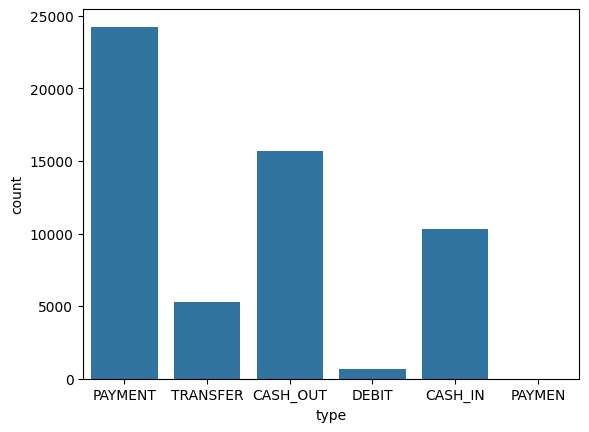

In [ ]:
sns.countplot(x='type',data=data)
plt.show()

<Axes: xlabel='type', ylabel='amount'>

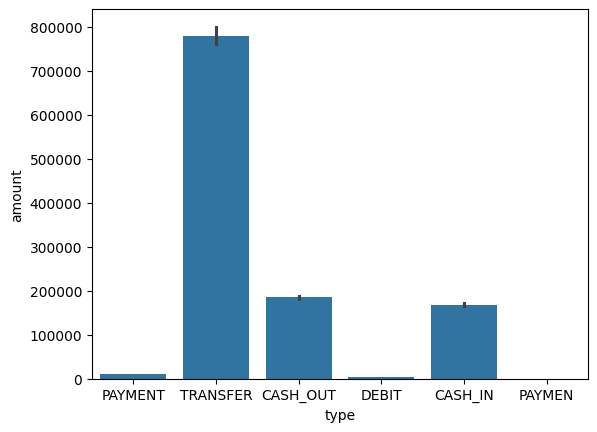

In [ ]:
sns.barplot(x='type',y='amount',data=data)

In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,56102
1.0,100


<ipython-input-9-a0bb9c0f97d2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'],bins=50)


<Axes: xlabel='step', ylabel='Density'>

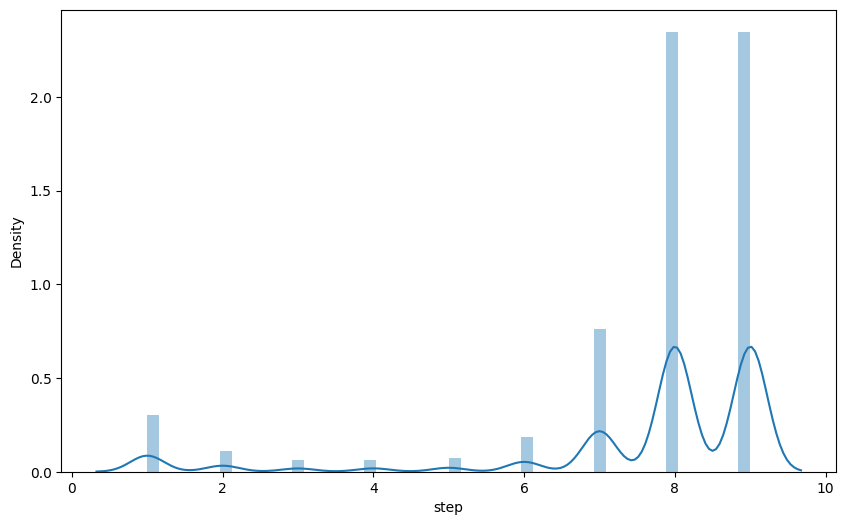

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(data['step'],bins=50)

In [ ]:
numeric_data = data.select_dtypes(include=['number'])

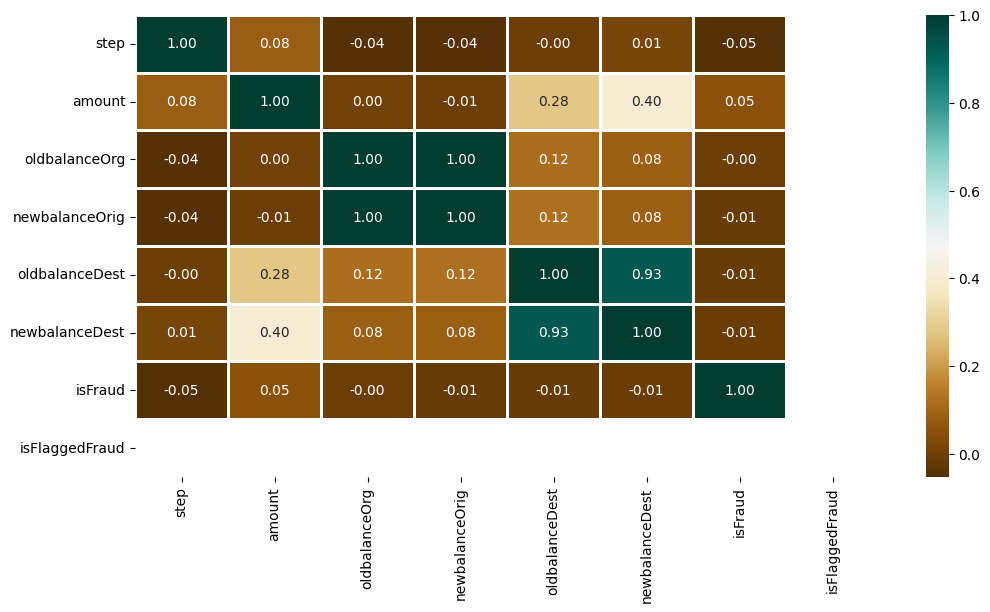

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)
plt.show()

In [ ]:
type_new = pd.get_dummies(data['type'],drop_first=True)
data_new = pd.concat([data,type_new],axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMEN,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,False,True,False


In [ ]:
x = data_new.drop(['isFraud','type','nameOrig','nameDest'],axis=1)
y = data_new['isFraud']

In [ ]:
x.shape,y.shape

((56203, 12), (56203,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
print(type(y_train))
print(y_train.head() if isinstance(y_train, pd.DataFrame) else y_train[:5])

<class 'pandas.core.frame.DataFrame'>
       step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
8428      7    8290.76       32051.00        23760.24            0.00   
30799     8    7693.89           0.00            0.00            0.00   
28032     8   83859.30           0.00            0.00       454154.02   
13504     7  225586.11     1507508.16      1281922.04      1579360.20   
29384     8   28596.11           0.00            0.00            0.00   

       newbalanceDest  isFlaggedFraud  CASH_OUT  DEBIT  PAYMEN  PAYMENT  \
8428             0.00             0.0     False  False   False     True   
30799            0.00             0.0     False  False   False     True   
28032       170309.52             0.0      True  False   False    False   
13504     12682009.97             0.0      True  False   False    False   
29384            0.00             0.0     False  False   False     True   

       TRANSFER  
8428      False  
30799     False  
28032     False  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

feature_columns = [
    'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest', 'CASH_OUT',
    'DEBIT', 'PAYMENT', 'TRANSFER'
]

X_train = X_train[feature_columns]
X_test = X_test[feature_columns]

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

train_notna_mask = y_train.notna()
X_train = X_train[train_notna_mask]
y_train = y_train[train_notna_mask]

test_notna_mask = y_test.notna()
X_test = X_test[test_notna_mask]
y_test = y_test[test_notna_mask]

models = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel='rbf', probability=True),
    RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
]

for model in models:
    model.fit(X_train, y_train)
    print(f'{model} : ')

    train_preds = model.predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = model.predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.9412798577326533
Validation Accuracy :  0.912229372909273

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9874072438912568

SVC(probability=True) : 
Training Accuracy :  0.8923527384114002


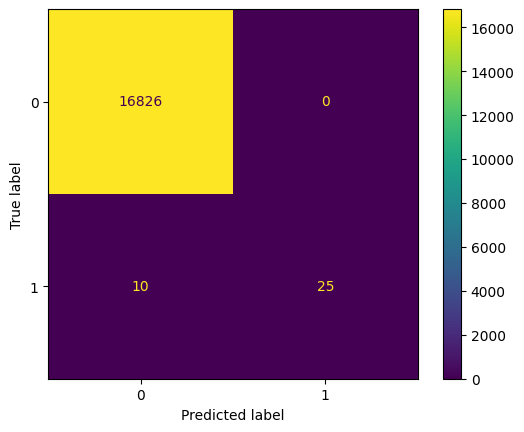

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, models[1].predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[1].classes_)
disp.plot()
plt.show()